In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1450 Broadway

In [272]:
path="1450 Boradway Timesheets - 03212019.xlsx"
path1="1450 Broadway FieldLens.csv"
dataTX = pd.read_excel(path)
dataFL = pd.read_csv(path1,index_col=3, parse_dates=True)

In [257]:
dataFL = dataFL.sort_index()
dataFL = dataFL.loc['2019-02-01':]
dataFL_DT = dataFL[["num_of_workers","name"]]
dataFL_DT

,num_of_workers,name
date,,
2019-02-01,3,Pentagon Electric
2019-02-01,1,Premier Sanitation
2019-02-04,2,Elite Glass
2019-02-04,1,Premier Sanitation
2019-02-04,3,City Carpentry
2019-02-05,11,Mitie Plumbing & Heating Corp.
2019-02-05,1,Interstate Air
2019-02-05,2,Elite Glass
2019-02-05,1,Premier Sanitation


In [233]:
dailyFL = dataFL.groupby(["date"]).sum()
dailyFL = dailyFL[["num_of_workers"]]
dailyFL

,num_of_workers
date,
2019-02-01,4
2019-02-04,6
2019-02-05,18
2019-02-06,19
2019-02-07,18
2019-02-08,18
2019-02-11,26
2019-02-12,29
2019-02-13,36


In [230]:
dataTX=dataTX.replace({0: None})
dailyTX = dataTX.count()
dailyTX = pd.DataFrame(dailyTX,columns=["headcount"])[5:]

In [213]:
daily = dailyTX.join(dailyFL, how='outer')
daily.index = pd.to_datetime(daily.index).date

daily = daily[["num_of_workers","headcount"]]
daily = daily.rename(index=str, columns={"num_of_workers": "FL_headcount","headcount":"Triax_headcount"})
daily["difference"] = daily["FL_headcount"] - daily["Triax_headcount"]
daily

,FL_headcount,Triax_headcount,difference
2019-02-01,4.0,1,3.0
2019-02-02,NaN,0,NaN
2019-02-03,NaN,0,NaN
2019-02-04,6.0,1,5.0
2019-02-05,18.0,1,17.0
2019-02-06,19.0,2,17.0
2019-02-07,18.0,2,16.0
2019-02-08,18.0,18,0.0
2019-02-09,NaN,0,NaN
2019-02-10,NaN,0,NaN


In [199]:
daily.to_csv("1450 Broadway Triax vs FieldLens.csv")

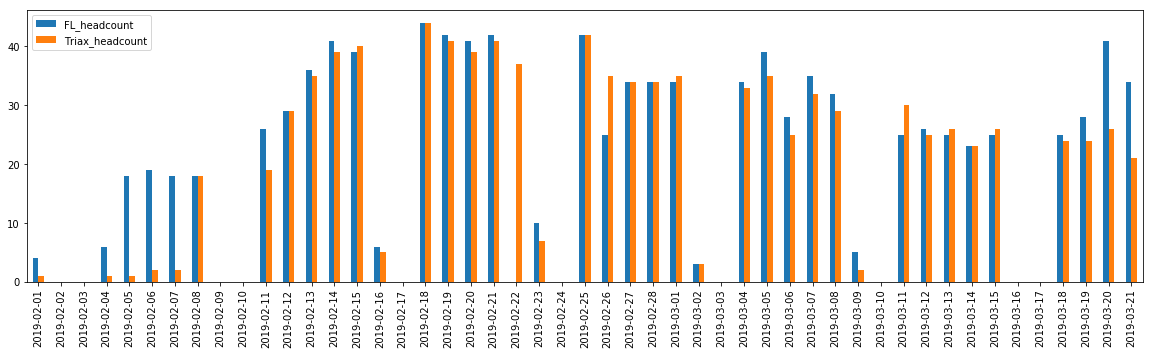

In [200]:
daily[["FL_headcount","Triax_headcount"]].plot.bar(figsize=(20,5))
plt.show()

In [297]:
dataTX_DT = dataTX.groupby(["Subcontractor"]).count()
dataTX_DT = dataTX_DT.T[4:]
dataTX_DT = pd.melt(dataTX_DT.reset_index(), id_vars='index')
dataTX_DT = dataTX_DT[dataTX_DT['value'] > 0]
dataTX_DT = dataTX_DT.rename(index=str, columns={"index": "date", "Subcontractor": "name", "value": "num_of_workers"})

In [299]:
dataTX_DT = dataTX_DT.set_index('date').sort_index()
dataTX_DT.set_index('name', append=True)

num_of_workers
date       name                                           
2019-02-01 Triax Technologies                            1
2019-02-04 Premier Sanitation                            1
2019-02-05 Premier Sanitation                            1
2019-02-06 Premier Sanitation                            1
           City Carpentry                                1
2019-02-07 City Carpentry                                1
           Premier Sanitation                            1
2019-02-08 Mitie Plumbing and Heating Corp              10
           Premier Sanitation                            1
           City Carpentry                                4
           Interstate  Air                               3
2019-02-11 City Carpentry                                8
           Mitie Plumbing and Heating Corp               8
           Premier Sanitation                            1
           Interstate  Air                               2
2019-02-12 Mitie Plumbing and Heating Corp              16
           Premier Sanitation                            1
           City Carpentry                                7
           Interstate  Air                               5
2019-02-13 City Carpentry                                8
           Interstate  Air                              11
           Mitie Plumbing and Heating Corp              15
           Premier Sanitation                            1
2019-02-14 Interstate  Air                              12
           Mitie Plumbing and Heating Corp              18
           Premier Sanitation                            1
           City Carpentry                                8
2019-02-15 Premier Sanitation                            1
           Mitie Plumbing and Heating Corp              19
           City Carpentry                                8
...                                                    ...
2019-03-14 Premier Sanitation                            1
           City Carpentry                                6
           Mitie Plumbing and Heating Corp               1
           Contact Electric                              6
           Interstate  Air                              13
2019-03-15 City Carpentry                                3
           Premier Sanitation                            1
           Interstate  Air                              14
           Mitie Plumbing and Heating Corp               2
           Contact Electric                              6
2019-03-18 Contact Electric                              6
           Interstate  Air                               9
           City Carpentry                                2
           Premier Sanitation                            1
           Mitie Plumbing and Heating Corp               6
2019-03-19 Premier Sanitation                            1
           City Carpentry                                3
           Interstate  Air                              11
           Contact Electric                              6
           Mitie Plumbing and Heating Corp               3
2019-03-20 Premier Sanitation                            1
           Contact Electric                              6
           Interstate  Air                              13
           City Carpentry                                3
           Mitie Plumbing and Heating Corp               5
2019-03-21 Mitie Plumbing and Heating Corp               3
           Premier Sanitation                            1
           Elite Glass                                   1
           City Carpentry                                3
           Interstate  Air                              13

[159 rows x 1 columns]

In [260]:
dataFL_DT.set_index('name', append=True)


num_of_workers
date       name                                          
2019-02-01 Pentagon Electric                            3
           Premier Sanitation                           1
2019-02-04 Elite Glass                                  2
           Premier Sanitation                           1
           City Carpentry                               3
2019-02-05 Mitie Plumbing & Heating Corp.              11
           Interstate Air                               1
           Elite Glass                                  2
           Premier Sanitation                           1
           City Carpentry                               3
2019-02-06 Mitie Plumbing & Heating Corp.              11
           Premier Sanitation                           1
           Interstate Air                               1
           City Carpentry                               3
           Elite Glass                                  2
           Premier Sanitation                           1
2019-02-07 Premier Sanitation                           1
           City Carpentry                               3
           Mitie Plumbing & Heating Corp.              12
           Interstate Air                               2
2019-02-08 Interstate Air                               3
           Mitie Plumbing & Heating Corp.              10
           Premier Sanitation                           1
           City Carpentry                               4
2019-02-11 Interstate Air                               3
           Premier Sanitation                           1
           City Carpentry                               7
           Mitie Plumbing & Heating Corp.              15
2019-02-12 City Carpentry                               7
           Mitie Plumbing & Heating Corp.              16
...                                                   ...
2019-03-18 Matrix Technology Group LLC                  1
           Matrix Technology Group LLC                  1
           Matrix Technology Group LLC                  1
           Premier Sanitation                           1
           City Carpentry                               3
           Mitie Plumbing & Heating Corp.               3
           Interstate Air                               8
           Contact Electric Corp.                       6
2019-03-19 Contact Electric Corp.                       6
           City Carpentry                               3
           Premier Sanitation                           1
           Interstate Air                              15
           Mitie Plumbing & Heating Corp.               3
2019-03-20 Matrix Technology Group LLC                  2
           Contact Electric Corp.                       8
           Matrix Technology Group LLC                  2
           City Carpentry                               3
           Interstate Air                              15
           Matrix Technology Group LLC                  2
           Mitie Plumbing & Heating Corp.               6
           Matrix Technology Group LLC                  2
           Premier Sanitation                           1
2019-03-21 City Carpentry                               5
           Matrix Technology Group LLC                  2
           Mitie Plumbing & Heating Corp.               5
           Matrix Technology Group LLC                  2
           Matrix Technology Group LLC                  2
           Matrix Technology Group LLC                  2
           Interstate Air                              15
           Premier Sanitation                           1

[174 rows x 1 columns]